In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
import matplotlib
import tensorflow as tf
from tensorflow import keras
import math
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('./data/customer_churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [21]:
# Drop customer ID
df.drop(['customerID'],axis=1, inplace=True)
# 'SeniorCitizen',
categorical_columns = ['gender','Partner','Dependents','PhoneService','MultipleLines','SeniorCitizen','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod']
numerical_columns = ['tenure','MonthlyCharges','TotalCharges']

The TotalCharges is in object type. I'll change it to numerical type.

I ran to_numeric the first round but it can't convert because TotalCharges has some blank string. I'll use errors='coerce' to ignore those blank and change them to NaN

In [5]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df[df['TotalCharges'].isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [8]:
# Drop 11 rows with TotalCharges is NaN.
df = df[df['TotalCharges'].notnull()]

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [10]:
categorical_columns

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'SeniorCitizen',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

Plot categorical columns relating to Churn

for column in categorical_columns:
    sns.countplot(x=column, hue='Churn', data=df)
    plt.show()

# Plot histogram for numerical data with hue on y column 
for i in numerical_columns:
    sns.displot(x=i,data=df,hue='Churn',multiple="stack")
    plt.title(i)
    plt.show()

Some categorical columns has more than two categories. We will try to convert to two categories. For example, in OnlineSecurity, we will assume 'No Internet service' as 'No' in that category. 

In [11]:
for column in df.columns:
    print(f'{column}: {df[column].unique()}')

customerID: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 '

In [12]:
columns_to_change = ['OnlineSecurity','OnlineBackup' ,'DeviceProtection','TechSupport' ,'StreamingTV','StreamingMovies']
for column in columns_to_change:
    df[column] = df[column].apply(lambda x: 'No' if x=='No internet service' else x)
    
# for MultipleLines, changes 'No phone service' to No
df['MultipleLines'] = df['MultipleLines'].apply(lambda x: 'No' if x == 'No phone service' else x)

In [13]:
for column in df.columns:
    print(f'{column}:  {df[column].unique()}')

customerID:  ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender:  ['Female' 'Male']
SeniorCitizen:  [0 1]
Partner:  ['Yes' 'No']
Dependents:  ['No' 'Yes']
tenure:  [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService:  ['No' 'Yes']
MultipleLines:  ['No' 'Yes']
InternetService:  ['DSL' 'Fiber optic' 'No']
OnlineSecurity:  ['No' 'Yes']
OnlineBackup:  ['Yes' 'No']
DeviceProtection:  ['No' 'Yes']
TechSupport:  ['No' 'Yes']
StreamingTV:  ['No' 'Yes']
StreamingMovies:  ['No' 'Yes']
Contract:  ['Month-to-month' 'One year' 'Two year']
PaperlessBilling:  ['Yes' 'No']
PaymentMethod:  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges:  [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges:  [  29.85 1889.5   108.15 ...  346

In [14]:
# Now we will convert columns with 'Yes' and 'No' categories  into 1 and 0 values.
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup', 'DeviceProtection','TechSupport','StreamingTV','StreamingMovies', 'PaperlessBilling','Churn']
for col in yes_no_columns:
    df[col].replace({'Yes': 1,'No': 0},inplace=True)
    
# For gender column, replace Female = 1 & Male = 0 
df['gender'].replace({'Female':1,'Male':0},inplace=True)

In [22]:
# For columns with more than 2 categories, we will use 'one-hot-encoding' by get_dummies
for column in df.columns:
    if df[column].dtypes == 'object':
        print(f'{column}:  {df[column].unique()}')

InternetService:  ['DSL' 'Fiber optic' 'No']
Contract:  ['Month-to-month' 'One year' 'Two year']
PaymentMethod:  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [24]:
df2 = pd.get_dummies(data=df,columns=['InternetService','Contract','PaymentMethod'])
for column in df2.columns:
    print(f'{column}:  {df2[column].unique()}')

In [28]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   7032 non-null   int64  
 1   SeniorCitizen                            7032 non-null   int64  
 2   Partner                                  7032 non-null   int64  
 3   Dependents                               7032 non-null   int64  
 4   tenure                                   7032 non-null   int64  
 5   PhoneService                             7032 non-null   int64  
 6   MultipleLines                            7032 non-null   int64  
 7   OnlineSecurity                           7032 non-null   int64  
 8   OnlineBackup                             7032 non-null   int64  
 9   DeviceProtection                         7032 non-null   int64  
 10  TechSupport                              7032 no

Now all data type are numerical!

Next step, we need to scale MonthlyCharges, tenure, and TotalCharges.

In [32]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

### Model Building

In [35]:
X =  df2.drop('Churn',axis=1)
y = df2['Churn']

In [41]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state = 5)

In [49]:
model= keras.Sequential([
    keras.layers.Dense(20,input_shape=(26,),activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train,y_train,epochs=100)

Epoch 1/100
176/176 [==============================] - 1s 2ms/step - loss: 0.5346 - accuracy: 0.7393
Epoch 2/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4327 - accuracy: 0.7965
Epoch 3/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4148 - accuracy: 0.8055
Epoch 4/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4150 - accuracy: 0.8109
Epoch 5/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4090 - accuracy: 0.8074
Epoch 6/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4019 - accuracy: 0.8100
Epoch 7/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4149 - accuracy: 0.8065
Epoch 8/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3989 - accuracy: 0.8175
Epoch 9/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4046 - accuracy: 0.8125
Epoch 10/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4140 - accura

In [51]:
model.evaluate(X_test,y_test)

44/44 [==============================] - 0s 2ms/step - loss: 0.4534 - accuracy: 0.7775


[0.4534251391887665, 0.7775408625602722]

In [53]:
yp = model.predict(X_test)
yp[:5]

array([[0.19851884],
       [0.47180313],
       [0.00694102],
       [0.7322924 ],
       [0.5093403 ]], dtype=float32)

In [54]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [60]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85       999
           1       0.65      0.51      0.57       408

    accuracy                           0.78      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.77      0.78      0.77      1407



<AxesSubplot:>

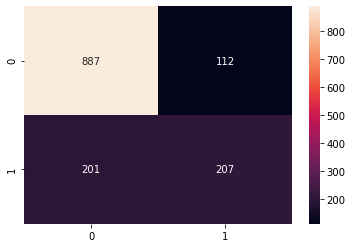

In [62]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d')

In [74]:
# Save model
model.save('./model')

INFO:tensorflow:Assets written to: ./assets


In [4]:
model = keras.models.load_model('./model')

In [5]:
model